# Quadrature

This notebook illustrates the quadrature routines available in 
quantecon. These routines are Python implementations of MATLAB 
routines originally written by Mario Miranda and Paul Fackler as part 
of their influential compecon toolkit ([http://www4.ncsu.edu/~pfackler/compecon/toolbox.html](http://www4.ncsu.edu/~pfackler/compecon/toolbox.html)). We are indebted 
to Mario and Paul for their pioneering work on numerical dynamic 
programming and their support for the development of Python 
implementations. For further information on the compecon toolkit see 
Miranda, Mario J, and Paul L Fackler. Applied Computational Economics and Finance, MIT Press, 2002. 

The Python versions of the routines are written by Chase Coleman and Spencer Lyon. 

The examples contained in this document were derived from the examples named `demqua##.m` that are provided with the CompEcon toolbox. Many of them come from the 2005 version of the toolbox, others come from the 2014 version. The year is indiciated next to each reference.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from quantecon.quad import *

%matplotlib inline

np.random.seed(42)  # For reproducability

## Plot Equi-Distributed Sequences in 2-D

### Based on `demqua01.m` (2005)

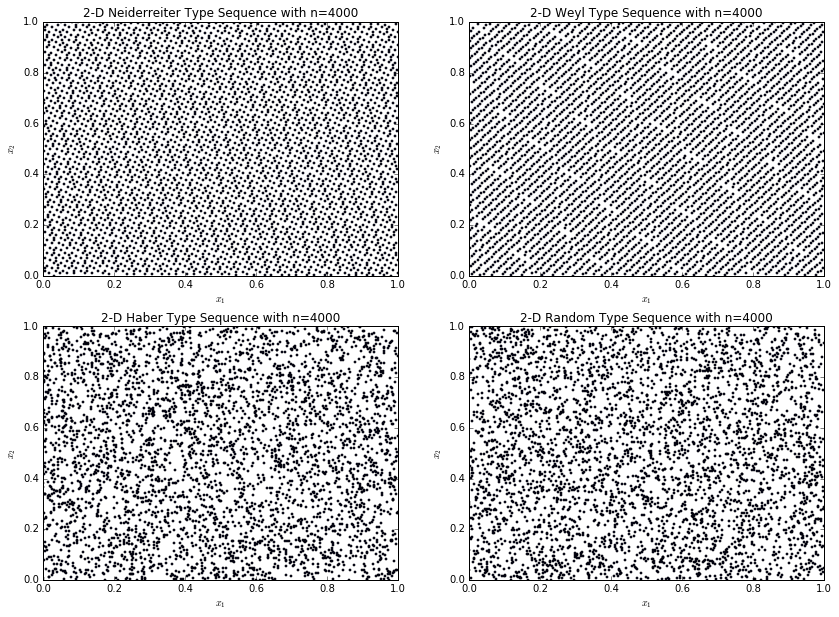

In [14]:
def plotequi(ax, kind, n, a, b, **kwargs):
    """
    This function is to simplify the plotting process.  It takes
    the parameters to qnwequi and plots the output on the axis ax.
    """
    kind_names = {"N":"Neiderreiter", "W":"Weyl", "H":"Haber", "R":"Random"}
    pts, wts = qnwequi(n, a, b, kind)
    
    pt_alph = wts/wts.max()
    
    if n > 1000:
        sze = 3
    else:
        sze = 10
    
    ax.set_title("2-D {} Type Sequence with n={}".format(kind_names[kind], n))
    ax.set_xlabel(r"$x_1$")
    ax.set_ylabel(r"$x_2$")
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    
    ax.scatter(pts[:, 0], pts[:, 1], s=sze, **kwargs)

    return None

# Create a figure and subplots
fig, axess = plt.subplots(2, 2, figsize=(14, 10))
axess = axess.flatten()

# Want to plot these kinds
kinds = ["N", "W", "H", "R"]

n = 4000
a = np.array([0, 0])
b = np.ones(2)

for ind, kind in enumerate(kinds):
  plotequi(axess[ind], kind, n, a, b)

plt.show()

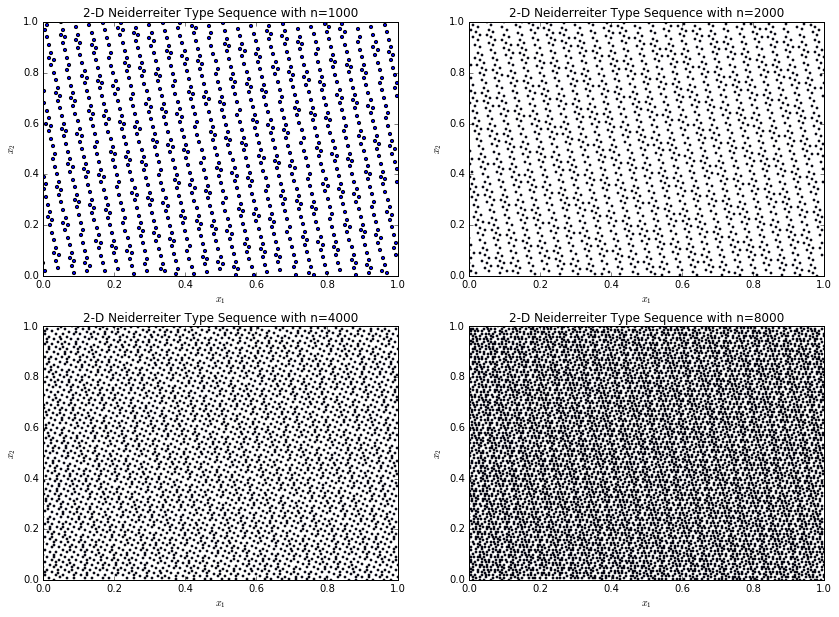

In [15]:
# Create a figure and subplots
fig, axess = plt.subplots(2, 2, figsize=(14, 10))
axess = axess.flatten()

# Want to plot these kinds
kind = "N"
num_n = [1000, 2000, 4000, 8000]

a = np.array([0, 0])
b = np.ones(2)

for ind, n in enumerate(num_n):
  plotequi(axess[ind], kind, n, a, b)

plt.show()

## Montecarlo Integration vs Integration by Quadrature

### Based on `demqua02.m` (2014)


In [16]:
#Set parameters for normal
mu = np.zeros(2)
sigma = np.array([[1., .5], [.5, 1.]])

# Define a function
f = lambda x: x[:, 0]**2 + 2*x[:, 0]*x[:, 1] - 3*x[:, 1]**2

# Setparameters
n = 50000

# Montecarlo Int
mvn = multivariate_normal(cov=sigma)
randsamp = mvn.rvs(n)
mc_int = f(randsamp).sum()/n

# Quadrature Int
n = np.array([3, 3])
pts, wts = qnwnorm(n, mu, sigma)
qnwnorm_int = np.dot(wts.T, f(pts))

# Compute diff
diff_int = mc_int - qnwnorm_int

print("The Montecarlo integration provides the result %.5f" %mc_int)
print("The Quadrature integration provides the result %.5f" %qnwnorm_int)
print("The difference between the two is: %.5f" %diff_int)

The Montecarlo integration provides the result -0.98797
The Quadrature integration provides the result -1.00000
The difference between the two is: 0.01203


## Compare Quadrature Methods

### Based on `demqua03.m` and `demqua04.m` (2005)

## 1d quadrature

In [17]:
kinds = ["lege", "cheb", "trap", "simp", "N", "W", "H", "R"]

# Define some functions
f1 = lambda x: np.exp(-x)
f2 = lambda x: 1 / (1 + 25 * x**2)
f3 = lambda x: np.abs(x) ** 0.5
f4 = lambda x: np.exp(-x*x / 2)
func_names = ["f1", "f2", "f3", "f4"]

# Integration parameters
n = np.array([3, 5, 11, 21, 31, 51, 101, 401])  # number of nodes
a, b = -1, 1  # endpoints
a4, b4 = -1, 2

# Set up pandas DataFrame to hold results
ind = pd.MultiIndex.from_product([func_names, n])
ind.names=["Function", "Number of Nodes"]
cols = pd.Index(kinds, name="Kind")
res_df = pd.DataFrame(index=ind, columns=cols)

for ind, func in enumerate([f1, f2, f3]):
    func_name = func_names[ind]
    for kind in kinds:
        for num in n:
            res_df.ix[func_name, num][kind] = quadrect(func, num, a, b, kind)

for kind in kinds:
    for num in n:
        res_df.ix["f4", num][kind] = quadrect(f4, num, a4, b4, kind)

res_df

Kind                          lege      cheb      trap      simp         N  \
Function Number of Nodes                                                     
f1       3                 2.35034   2.35469   2.54308   2.36205   2.25255   
         5                  2.3504   2.35041   2.39917   2.35119   2.58707   
         11                 2.3504    2.3504   2.35823   2.35042   2.35851   
         21                 2.3504    2.3504   2.35236    2.3504   2.28601   
         31                 2.3504    2.3504   2.35127    2.3504   2.35321   
         51                 2.3504    2.3504   2.35072    2.3504   2.36676   
         101                2.3504    2.3504   2.35048    2.3504   2.34362   
         401                2.3504    2.3504   2.35041    2.3504   2.35517   
f2       3                0.958333   1.15612   1.03846   1.35897  0.528052   
         5                0.706948  0.736611  0.657162  0.530062  0.453048   
         11               0.562458  0.566156  0.551222  0.569834  0.615804   
         21               0.549605  0.549632  0.549242  0.548582  0.550435   
         31               0.549365  0.549368  0.549306  0.549394  0.557239   
         51                0.54936   0.54936  0.549341   0.54936  0.542821   
         101               0.54936   0.54936  0.549355   0.54936  0.551671   
         401               0.54936   0.54936   0.54936   0.54936   0.54822   
f3       3                0.977902  0.827204         1  0.666667   1.29475   
         5                 1.15352    1.1331   1.20711   1.27614   1.37137   
         11                1.27395   1.26915   1.29948   1.27349   1.26566   
         21                1.31011   1.30933   1.32102    1.3282   1.31891   
         31                1.32024    1.3199   1.32655   1.32181   1.32947   
         51                1.32707   1.32697   1.33014   1.32798   1.33274   
         101               1.33107   1.33105   1.33219   1.33287   1.33188   
         401               1.33305   1.33305   1.33319   1.33328   1.33363   
f4       3                 2.05551   2.08746   1.88014   2.13593   2.26652   
         5                 2.05191   2.05152   2.01037   2.05378   2.17482   
         11                2.05191   2.05191   2.04532   2.05196   2.15582   
         21                2.05191   2.05191   2.05027   2.05192   2.06764   
         31                2.05191   2.05191   2.05118   2.05191   2.05861   
         51                2.05191   2.05191   2.05165   2.05191   2.06765   
         101               2.05191   2.05191   2.05185   2.05191   2.05172   
         401               2.05191   2.05191   2.05191   2.05191    2.0545   

Kind                             W         H         R  
Function Number of Nodes                                
f1       3                 2.25255   2.59348   1.99805  
         5                 2.58707   3.08421   2.11507  
         11                2.35851   2.24579   2.24213  
         21                2.28601   2.01092   1.96174  
         31                2.35321   2.14988   2.47553  
         51                2.36676    2.3051   2.33318  
         101               2.34362   2.22584   2.28676  
         401               2.35517   2.34141   2.33741  
f2       3                0.528052   1.12402  0.752525  
         5                0.453048  0.746743  0.509264  
         11               0.615804  0.611333   0.62777  
         21               0.550435  0.588515  0.385857  
         31               0.557239  0.620654  0.569447  
         51               0.542821  0.526572  0.488996  
         101              0.551671   0.54247  0.616739  
         401               0.54822  0.535957  0.617324  
f3       3                 1.29475  0.868817   1.15497  
         5                 1.37137   1.16264   1.02986  
         11                1.26566   1.22452   1.21618  
         21                1.31891   1.22429   1.20045  
         31                1.32947   1.20256   1.36386  
         51                1.33274  

## 2d quadrature

### Based on `demqua04.m` (2005)

In [18]:
# Define 2d functions
f1_2 = lambda x: np.exp(x[:, 0] + x[:, 1])
f2_2 = lambda x: np.exp(-x[:, 0] * np.cos(x[:, 1]**2))
func_names_2 = ["f1_2", "f2_2"]

# Set up pandas DataFrame to hold results
a = ([0, 0], [-1, -1])
b = ([1, 2], [1, 1])
ind_2 = pd.MultiIndex.from_product([func_names_2, n**2])
ind_2.names = ["Function", "Number of Nodes"]
res_df_2 = pd.DataFrame(index=ind_2, columns=cols)

for ind, func in enumerate([f1_2, f2_2]):
    func_name = func_names_2[ind]
    for num in n:
        for kind in kinds[:4]:
            res_df_2.ix[func_name, num**2][kind] = quadrect(func, [num, num], a[ind], b[ind], kind);
        for kind in kinds[4:]:
            res_df_2.ix[func_name, num**2][kind] = quadrect(func, num**2, a[ind], b[ind], kind);
        
res_df_2

Kind                         lege     cheb     trap     simp        N  \
Function Number of Nodes                                                
f1_2     9                10.9779  10.9996  12.1246  11.0363   9.3755   
         25               10.9782  10.9782  11.2643  10.9821  11.2489   
         121              10.9782  10.9782  11.0239  10.9783  11.0474   
         441              10.9782  10.9782  10.9896  10.9782  10.9577   
         961              10.9782  10.9782  10.9833  10.9782  10.9772   
         2601             10.9782  10.9782    10.98  10.9782  10.9702   
         10201            10.9782  10.9782  10.9787  10.9782  10.9769   
         160801           10.9782  10.9782  10.9782  10.9782  10.9784   
f2_2     9                4.57241  4.55811  4.69263   4.5492  5.39839   
         25               4.58115  4.58269  4.62863  4.58819  4.54799   
         121                4.581    4.581  4.58951  4.58128  4.57914   
         441                4.581    4.581  4.58316  4.58101  4.58567   
         961                4.581    4.581  4.58196    4.581  4.58185   
         2601               4.581    4.581  4.58134    4.581  4.58444   
         10201              4.581    4.581  4.58108    4.581  4.58319   
         160801             4.581    4.581    4.581    4.581  4.58118   

Kind                            W        H        R  
Function Number of Nodes                             
f1_2     9                11.4683   11.037   15.344  
         25               11.3863  10.4907  11.4881  
         121              10.9508  11.0763  10.7374  
         441              10.9715  10.7512  11.3674  
         961              10.9954  11.0277  11.0893  
         2601             10.9817  10.9303  11.4035  
         10201            10.9782  10.9338  11.0431  
         160801           10.9781  10.9676  10.9849  
f2_2     9                4.45085  4.45785  5.47389  
         25               4.53127   3.9939  4.22545  
         121              4.60895  4.50129  4.66052  
         441              4.58372  4.51448  4.31931  
         961              4.58396  4.65759  4.69355  
         2601             4.58205  4.62029  4.54357  
         10201            4.58107  4.59655  4.61698  
         160801           4.58101   4.5802  4.57298

## Compare Chebyshev and Legendre Quadrature Nodes and Weights

### Based on `demqua05.m` (2005)

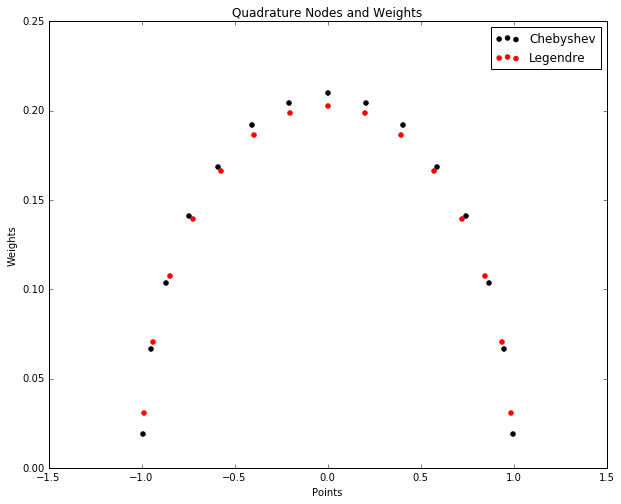

In [19]:
# Set parameters
n = 15
a = -1
b = 1

pts_cheb, wts_cheb = qnwcheb(n, a, b)
pts_lege, wts_lege = qnwlege(n, a, b)

fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))

ax1.set_title("Quadrature Nodes and Weights")
ax1.set_xlabel("Points")
ax1.set_ylabel("Weights")
ax1.scatter(pts_cheb, wts_cheb, label="Chebyshev", color="k")
ax1.scatter(pts_lege, wts_lege, label="Legendre", color="r")
ax1.legend();


## Area under normal pdf using Simpson's rule

### Based on `demqua04.m` (2014)

This example provides a visual for how Simpson's rule calculates the cdf of the standard normal distribution up to the point $z=1$.

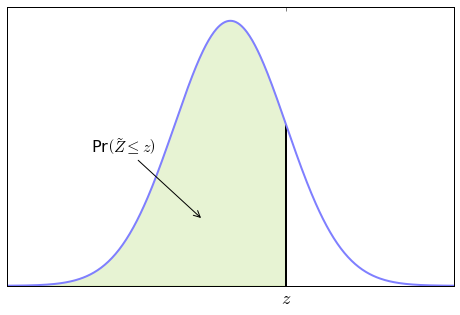

In [20]:
from scipy.stats import norm
# Define parameters
n = 11
a = 0
z = 1

# Compute nodes/weights
x, w = qnwsimp(n,a,z)

# Define f as standard normal pdf
f = norm(0, 1).pdf

prob = 0.5 + w.dot(f(x))

# Plot
b = 4.0
a = -b
n = 500
x = np.linspace(a, b, n)
y = f(x)

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot([a, b], [0.0, 0.0], "k-")
ax.plot([z, z], [0, f(z)], "k-", lw=2)
ax.plot(x, y, lw=2, color="#7F7FFF")
ax.fill_between(x, y, where=x<z, color="#8AC627", alpha=0.2)

# add annotations
ax.annotate(r"Pr$\left(\tilde Z \leq z \right)$", xy=(-0.5, 0.1), 
            xytext=(-2.5, .2), fontsize=16,
            arrowprops=dict(arrowstyle="->"))

ax.set_xticks((z,))
ax.set_yticks(())
ax.set_xticklabels((r'$z$',), fontsize=18)
ax.set_ylim(0, .42)

plt.show()

## Willingness to pay, expected utility model

### Based on `demqua05.m` (2014)

In [21]:
n = 100
mu = 0     
var = 0.1
alpha = 2  
ystar = 1
y, w = qnwlogn(n, mu, var)
expectedutility = -w.dot(np.exp(-alpha*y))
certainutility = np.exp(-alpha*ystar)

ystar = -np.log(-expectedutility)/alpha
wtp = w.dot(y)-ystar

print("Expected utility: %.4f" % expectedutility)
print("Certain utility: %.4f" % certainutility)
print("Willingness to pay: %.4f" % wtp)

Expected utility: -0.1479
Certain utility: 0.1353
Willingness to pay: 0.0958


## Area under a curve

### Based on `demqua06.m` (2014)

This example provides a visual for the area that is computed when a function is computed on an interval

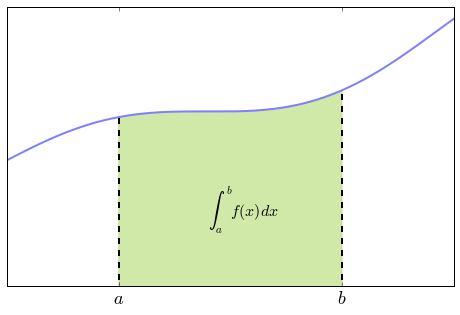

In [22]:
# Define function
f = lambda x: 50 - np.cos(np.pi * x) * (2 * np.pi * x - np.pi + 0.5)**2

xmin, xmax = 0, 1
a, b = 0.25, 0.75
n = 401
x = np.linspace(xmin, xmax, n)
y = f(x)

# plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x, y, lw=2, color="#7F7FFF")
where_inds = (a <= x) & (x <= b)
ax.fill_between(x, y, 0.0, color="#8AC627", 
                where=where_inds, alpha=0.4)
ax.set_ylim(25, 65)
ax.vlines([a, b], [0, 0], [f(a), f(b)], lw=2, linestyles ="--")

# Annotate the plot
ax.set_xticks((a,b))
ax.set_yticks(())
ax.set_xticklabels((r"$a$", r"$b$"), fontsize=18)

ax.annotate(r"$\int_a^b f(x) dx$", xy=(0.45, 35), fontsize=16)
plt.show()

## Illustrating integration using Trapezoidal rule

### Based on `demqua07.m` (2014)

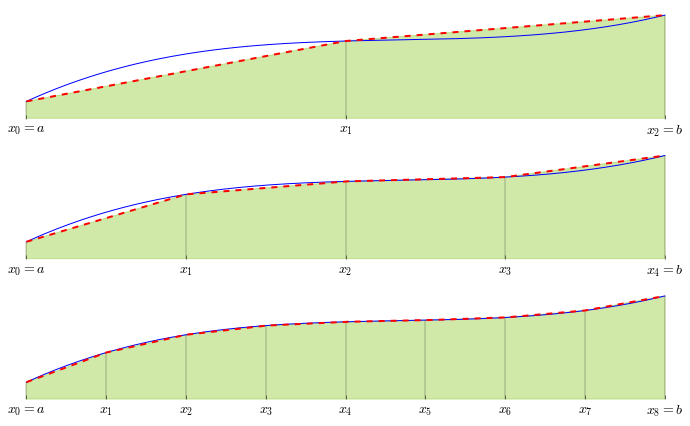

In [23]:
# Define function
c = np.array([2.00, -1.00, 0.50, 0.0])
f = np.poly1d(c)

# Basic Figure Setup
xmin = -1.0
xmax =  1.0
xwid = xmax-xmin
n = 401
x = np.linspace(xmin, xmax, n)
y = f(x)
ymin = min(y)
ymax = max(y)
ywid = ymax - ymin
ymin = ymin - 0.2*ywid
ymax = ymax + 0.1*ywid
fig, axs = plt.subplots(3, 1, figsize=(10, 6))
fig.tight_layout()


def trap_intervals(nint):
    "Split the region defined above into nint intervals"
    nnode = nint + 1
    xnode = np.linspace(xmin, xmax, nnode)
    ynode = f(xnode)
    
    # Calculate bins
    z = np.zeros(n)
    for i in range(1, nnode):
        k = np.where((x >= xnode[i-1]) & (x <= xnode[i]))[0]
        z[k] = ynode[i-1] + ((x[k]-xnode[i-1])*(ynode[i]-ynode[i-1]) 
                             /(xnode[i]-xnode[i-1]))
    
    return z, xnode, ynode


def plot_regions(z, xnode, ynode, ax):
    """
    Take "interval" data z and plot it with the actual function
    on the axes ax.
    """
    nint = xnode.size - 1
    
    # plot
    ax.plot(x, y)
    ax.plot(x, z, "r--", lw=2)
    ax.fill_between(x, z, ymin+0.02, color="#8AC627",
                    alpha=0.4)
    
    # annotate
    # Set ticks
    ax.set_xticks(xnode)
    x_tick_labs = [r"$x_0=a$"]
    x_tick_labs += [r"$x_%i$" % i for i in range(1, nint)]
    x_tick_labs += [r"$x_%i=b$" % nint]
    ax.set_xticklabels(x_tick_labs, fontsize=14)
    ax.xaxis.set_ticks_position('bottom')
    ax.set_yticks(())

    # remove borders
    for d in ["left", "right", "top", "bottom"]:
        ax.spines[d].set_visible(False)
    
    # set plot limits
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(xmin-0.05, xmax+0.05)
    
    # add lines to show bins
    ax.vlines(xnode, ymin, ynode, color="k", linestyles="-", lw=.25)
        
    return

plot_regions(*trap_intervals(2), ax=axs[0])
plot_regions(*trap_intervals(4), ax=axs[1])
plot_regions(*trap_intervals(8), ax=axs[2])